# 개요 

* 파이콘 세션 듣고  간단히 정리 <br>
  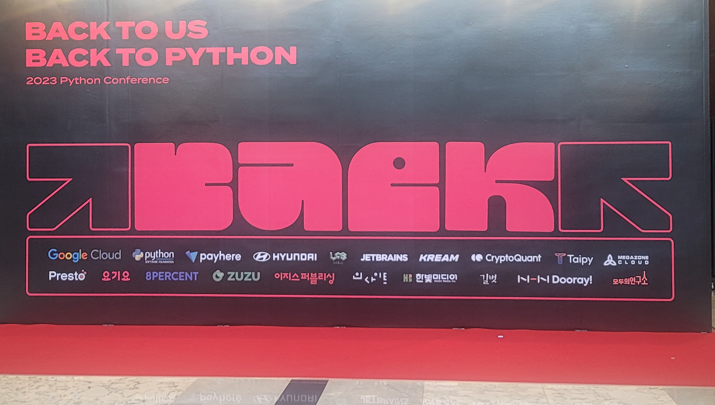
* [파이콘 사이트](https://2023.pycon.kr) : https://2023.pycon.kr/

# 세션내용 정리

## 메모리 확보하기
* 가상메모리 설정, 그래픽 설정 낮추기, 백그라운드 비활성화, 캐시 제거, 재부팅

## 메모리 사용량 줄이기

### 데이터 샘플링 (행/열 줄이기)
* df.sample(n), df.sample(frac=0.1)    * *frac:비율*
* 도메인에 따라 샘플링 기준 달라짐(특정 상품군/기간/고객군 등)
* 필요없는 컬럼 제거

### 청크(Chunked Processing)
* 메모리를 작은 청크로 나누어 처리(메모리에 청크 단위로 로드)
* pd.read_csv(chunksize=100)    * *chunksize만큼의 row를 가져옴*
* 아래와 같은 형식으로 사용
  ```python
  # Chunksize만큼 나누어서 리스트에 저장
  chunk_list = []
  for chunk in pd.read_scv('sample.csv', chunksize=100):
    # pd.to_numeric(, downcast='float)와 같은 옵션을 같이 사용하면 좋음
    chunk_list.apppend(chunk)
  
  # 리스트를 concat을 활용하여 하나로 결합
  pd.concat(chunk_list)
  ```
* 추가검색해보니 Chunk size지정에 대한 용량별 가이드가 있어 참고해봄 (공식문서아님, 블로그글 참고함)<br>
  출처 : https://acepor.github.io/2017/08/03/using-chunksize/
  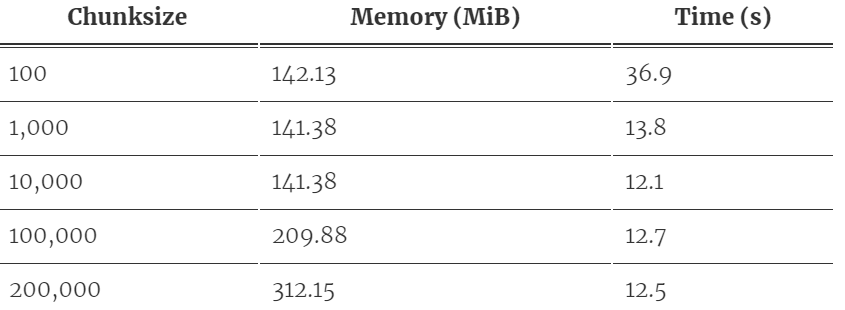

### Parquet형식 사용(데이터 압축)
  * Parquet : 효율적 데이터 저장/검색을 위한 오픈소스, 열 지향 형식, Java/Python/C++ 등 지원
  * 샘플코드(Codestral에게 유사하게 만들어달라고 함)
  ```python
  import pyarrow.parquet as pq
  import glob

  parquet_files = glob.glob('yourdirectory/*.parquet')

  for file in parquet_files:
      metadata = pq.read_metadata(file)
      print('Schema:', metadata.schema)
      print('Other Metadata:', metadata.metadata)
  ```
  * Kaggle의 Hotel booking demand로 실험한 것 보여주셨는데, 31.37GB → 4.95GB로 감소

### 데이터 타입을 지정해서 불러오기
* 아래와 같이 dtype을 지정해서 불러오는 경우 메모리 사용량이 절약될 수 있다
```python
  dtype_dict = {'기준년도':'uint16', '가입자일련번호':'uint32'}
  pd.read_csv('sample.csv', dtype=dtype_dict)
```
* Kaggle의 Hotel booking demand로 실험한 것 보여주셨는데, 29MB → 5.6MB로 감소

### 분산처리 프레임워크(Dask, Vaex, PySpark 등 사용)
* Dask : 병렬처리를 위한 분산 컴퓨팅 프레임워크, 큰 데이터를 처리할 수 있음, pandas와 유사한 API
* Vaex : 디스크 기반의 컬럼 지향방식을 활용하여 대용량 데이터 처리
  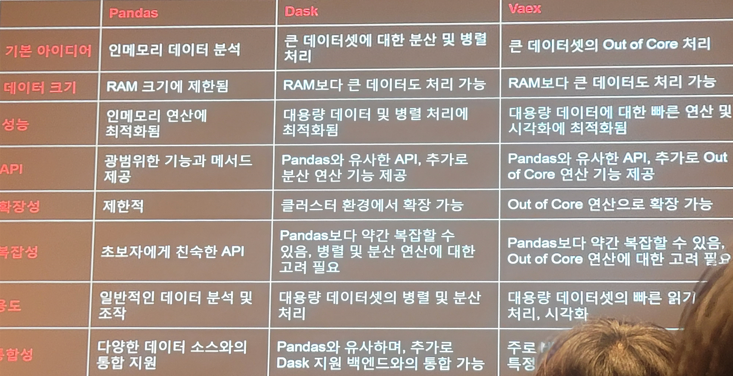
* PySpark : Apache spark의 Python API (대규모 데이터 처리를 위한 분산컴퓨팅프레임워크 Spark를 파이썬에서 사용)